Data Source : https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [1]:
import numpy as np
import pandas as pd
import plotly

In [2]:
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

init_notebook_mode(connected=True)

1.Get the big picture of the data.

In [3]:
data = pd.read_csv("D:\Download\Video\Data Science Material\Indonesia AI\Intermediate Python\Final Project\hotel.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


2.Show the properties of the data in each column, such as type, missing value, and others.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

3.Indicate the number of data, mean, median, and standard deviation.

4.What are the minimum and maximum values for a column containing numeric data?

In [7]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


5.a) Drop columns that contain missing values more than 50%.

In [8]:
data.isnull().sum()/data.shape[0]

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [9]:
data.shape[0]/2

59695.0

In [10]:
data.dropna(axis = 1, thresh = (data.shape[0]/2)+1, inplace = True)
data.isnull().sum()/data.shape[0]

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

5.b) Fill in the missing values in the country and children columns with the data that appears the most.

In [11]:
#Check in case there is more than one mode
data['country'].mode()

0    PRT
dtype: object

In [12]:
#Check in case there is more than one mode
data['children'].mode()

0    0.0
dtype: float64

In [13]:
data['country'] = data['country'].fillna(data['country'].mode()[0])
data['children'] = data['children'].fillna(data['children'].mode()[0])

5.c) Fill in the missing value in the agent column with the mean.

In [14]:
data['agent'] = data['agent'].fillna(data['agent'].mean())

In [15]:
#NullCheck
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

6.Create categories based on lead time: Short, Medium, and Long

In [16]:
np.percentile(data['lead_time'], 33)

32.0

In [17]:
np.percentile(data['lead_time'], 67)

125.0

In [18]:
np.percentile(data['lead_time'], 100)

737.0

In [19]:
data['time_category'] = np.where(data["lead_time"] > 125,"Long", np.where(data["lead_time"] > 32, "Medium", "Short"))
data['time_category'].value_counts()

Short     40081
Medium    39995
Long      39314
Name: time_category, dtype: int64

7.Filter all data that has reservation_status_date after 2017

In [20]:
data["reservation_status_date"] = pd.to_datetime(data["reservation_status_date"])
a = data.loc[data["reservation_status_date"] > '2017']
a['reservation_status_date']

9788     2017-01-02
9805     2017-01-03
9809     2017-01-04
9818     2017-01-06
9838     2017-01-10
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 36334, dtype: datetime64[ns]

8.Visualize the arrival date month to see the month that attracted the most visitors

In [21]:
data['visitors'] = data['adults']+data['children']+data['babies']

In [22]:
data_month_hotel = data.groupby(['arrival_date_month','hotel']).agg({'visitors':'sum'})
data_month_hotel = data_month_hotel.reset_index()
data_month_hotel.head()

,arrival_date_month,hotel,visitors
0,April,City Hotel,15101.0
1,April,Resort Hotel,6899.0
2,August,City Hotel,19401.0
3,August,Resort Hotel,11370.0
4,December,City Hotel,8145.0


In [23]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

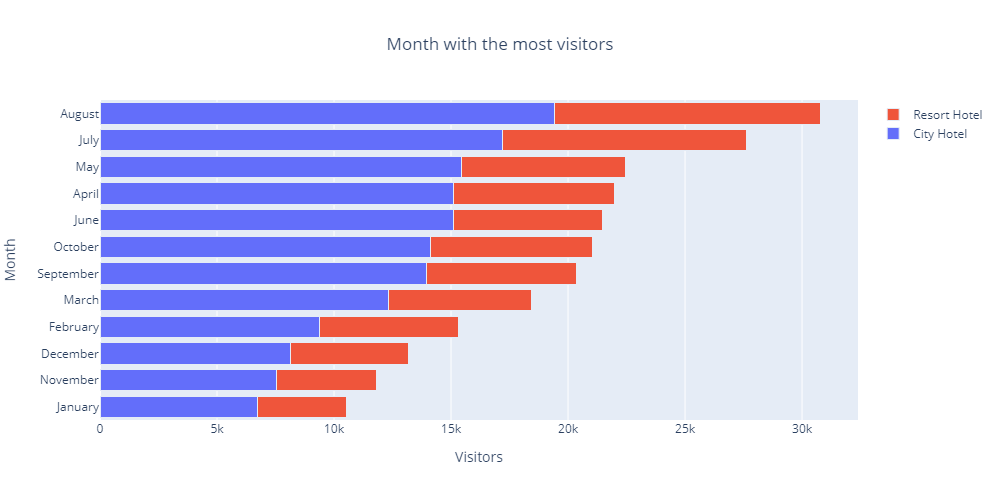

In [24]:
bar1 = go.Bar(
    y = data_month_hotel[data_month_hotel.hotel == 'City Hotel'].arrival_date_month,
    x = data_month_hotel[data_month_hotel.hotel == 'City Hotel'].visitors,
    name = 'City Hotel',
    orientation = 'h',
    marker = dict(
        line=dict(width=1)
    )
)

bar2 = go.Bar(
    y = data_month_hotel[data_month_hotel.hotel == 'Resort Hotel'].arrival_date_month,
    x = data_month_hotel[data_month_hotel.hotel == 'Resort Hotel'].visitors,
    name = 'Resort Hotel',
    orientation = 'h',
    marker=dict(
        line =dict(width=1)
    )
)

data = [bar1,bar2]
layout = dict(
    autosize=False,
    width=1000,
    height=500,
    barmode = 'stack',
    yaxis = dict(categoryorder = 'total ascending'),
    title= dict(
        text = 'Month with the most visitors',
        x = 0.5),
    xaxis_title='Visitors',
    yaxis_title='Month'
)

fig = go.Figure(data = data, layout = layout)
fig.show("png")